<a href="https://colab.research.google.com/github/tamarazoner/Biblioteca-PO/blob/master/Aula_33_e_37_Alocando_Dinheiro_x_Comprarando_Retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as dt
import datetime
#!pip install yfinance
import yfinance as y
import matplotlib.pyplot as plt
%matplotlib inline

# Alocação da Carteira

## Alocação da Carteira

### Variáveis que recebe o tempo desejado

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,1,1)

### Criação da Lista do Carteira

In [ ]:
petr = y.download('petr4.sa', start, end)
vale = y.download('vale3.sa', start, end)
itub = y.download('itub4.sa', start, end)
wege = y.download('wege3.sa', start, end)
ibov = y.download('^bvsp', start, end)

#petr = dt.get_data_yahoo('petr4.sa', start, end)
#vale = dt.get_data_yahoo('vale3.sa', start, end)
#itub = dt.get_data_yahoo('itub4.sa', start, end)
#wege = dt.get_data_yahoo('wege3.sa', start, end)
#ibov = dt.get_data_yahoo('^bvsp', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,12.479181,33461800
2018-01-03,16.490000,16.719999,16.370001,16.700001,12.592287,55940900
2018-01-04,16.780001,16.959999,16.620001,16.730000,12.614905,37064900
2018-01-05,16.700001,16.860001,16.570000,16.830000,12.690309,26958200
2018-01-08,16.740000,17.030001,16.709999,17.030001,12.841117,28400000
...,...,...,...,...,...,...
2019-12-20,30.600000,30.600000,30.020000,30.260000,24.257549,93064900
2019-12-23,30.190001,30.500000,30.030001,30.500000,24.449944,21970200
2019-12-26,30.590000,30.930000,30.500000,30.910000,24.778612,24810500


## Criando um For para normalização dos Retornos da Carteira

In [ ]:
for papeis in (petr, vale, itub, wege):
  papeis['Retorno Normalizado'] = papeis['Adj Close'] / papeis['Adj Close'].iloc[0]  #Normalizando os Retornos

## Alocando R$$ de acordo com o peso das carteira Capital Inicial de R$10.000,00
## 25% petr, 25% vale, 25% itub, 25% wege

### Alocando o peso de cada papel

In [ ]:
for papeis, peso in zip((petr, vale, itub, wege), [.25, .25, .25, .25]):
  papeis['Alocacao'] = papeis['Retorno Normalizado'] * peso

In [ ]:
petr

,Open,High,Low,Close,Adj Close,Volume,Retorno Normalizado,Alocacao
Date,,,,,,,,
2018-01-02,16.190001,16.549999,16.190001,16.549999,12.479181,33461800,1.000000,0.250000
2018-01-03,16.490000,16.719999,16.370001,16.700001,12.592287,55940900,1.009064,0.252266
2018-01-04,16.780001,16.959999,16.620001,16.730000,12.614905,37064900,1.010876,0.252719
2018-01-05,16.700001,16.860001,16.570000,16.830000,12.690309,26958200,1.016918,0.254230
2018-01-08,16.740000,17.030001,16.709999,17.030001,12.841117,28400000,1.029003,0.257251
...,...,...,...,...,...,...,...,...
2019-12-20,30.600000,30.600000,30.020000,30.260000,24.257549,93064900,1.943841,0.485960
2019-12-23,30.190001,30.500000,30.030001,30.500000,24.449944,21970200,1.959259,0.489815
2019-12-26,30.590000,30.930000,30.500000,30.910000,24.778612,24810500,1.985596,0.496399


### Calculando o Valor de acordo com seu peso de cada papel na carteira

In [ ]:
# Valor de Patrimonio por papel
for papeis in (petr, vale, itub, wege):
  papeis ['Valor Posicao'] = papeis ['Alocacao'] * 1000

### Calculando o Retorno em R$$ da carteira de acordo com cada peso

In [ ]:
# Cada busca feita em um papel é igual a uma aba do excel
# Para apurarmos o retorno da carteira de acordo com o seu peso que será o valor aplicado. Temos que unir tudo isso
# em uma aba só e para isso vamos usar o Concat
valor_posicoes = [petr['Valor Posicao'], vale['Valor Posicao'], itub['Valor Posicao'], wege['Valor Posicao']]
valor_carteira = pd.concat(valor_posicoes, axis=1)
# axis pega somente alinha, sem ele vai pegar a coluna inteira

In [ ]:
valor_carteira

,Valor Posicao,Valor Posicao,Valor Posicao,Valor Posicao
Date,,,,
2018-01-02,250.000000,250.000000,250.000000,250.000000
2018-01-03,252.265889,248.501889,251.709210,246.203035
2018-01-04,252.719010,249.520598,256.950825,243.804887
2018-01-05,254.229590,253.415630,257.691415,244.804165
2018-01-08,257.250788,259.048408,256.836897,246.802565
...,...,...,...,...
2019-12-20,485.960351,341.620370,348.139895,454.573313
2019-12-23,489.814656,340.310995,351.382838,453.743993
2019-12-26,496.398994,341.620370,356.724145,467.978069


### Renomeando os Titulos dos Ativos ou Colunas

In [ ]:
valor_carteira.columns = ['Petro', 'Vale', 'Itub', 'Wege']

In [ ]:
valor_carteira

,Petro,Vale,Itub,Wege
Date,,,,
2018-01-02,250.000000,250.000000,250.000000,250.000000
2018-01-03,252.265889,248.501889,251.709210,246.203035
2018-01-04,252.719010,249.520598,256.950825,243.804887
2018-01-05,254.229590,253.415630,257.691415,244.804165
2018-01-08,257.250788,259.048408,256.836897,246.802565
...,...,...,...,...
2019-12-20,485.960351,341.620370,348.139895,454.573313
2019-12-23,489.814656,340.310995,351.382838,453.743993
2019-12-26,496.398994,341.620370,356.724145,467.978069


# Calculando o Retorno da Carteira

### Calculando o Retorno da Carteira

In [ ]:
valor_carteira['Total R$'] = valor_carteira.sum(axis=1)

In [ ]:
valor_carteira

,Petro,Vale,Itub,Wege,Total R$
Date,,,,,
2018-01-02,250.000000,250.000000,250.000000,250.000000,1000.000000
2018-01-03,252.265889,248.501889,251.709210,246.203035,998.680022
2018-01-04,252.719010,249.520598,256.950825,243.804887,1002.995319
2018-01-05,254.229590,253.415630,257.691415,244.804165,1010.140800
2018-01-08,257.250788,259.048408,256.836897,246.802565,1019.938659
...,...,...,...,...,...
2019-12-20,485.960351,341.620370,348.139895,454.573313,1630.293929
2019-12-23,489.814656,340.310995,351.382838,453.743993,1635.252481
2019-12-26,496.398994,341.620370,356.724145,467.978069,1662.721578


### Comprarando o Retorno da Carteira com o Ibovespa e Exibindo no Gráfico Normalizado (Todos Ativos da Carteira em um único Ativo, Média dos ativos)

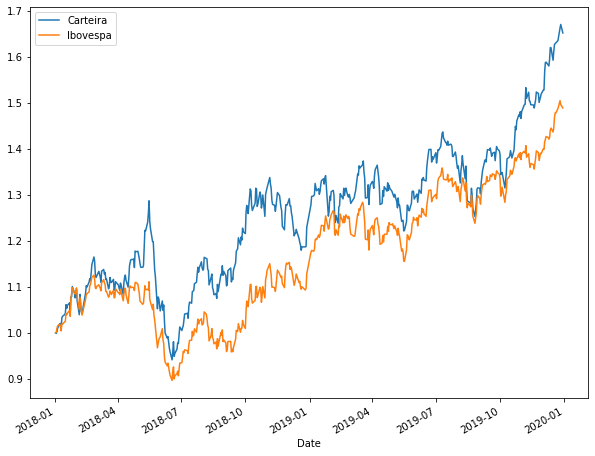

In [ ]:
(valor_carteira['Total R$'] / valor_carteira['Total R$'].iloc[0]).plot(figsize=(10,8), label="Carteira")
(ibov['Adj Close'] /  ibov['Adj Close'].iloc[0]).plot(label="Ibovespa")
plt.legend()

### Exibir Gráficamente de foma Normalizada Todos os Ativos da Carteira

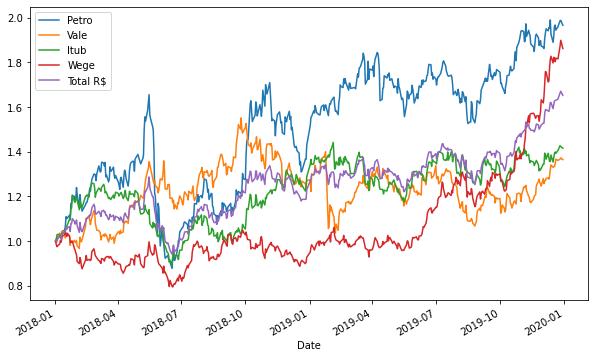

In [ ]:
(valor_carteira / valor_carteira.iloc[0]).plot(figsize=(10,6))

# Calculo do Retorno Diário da Carteira

### Calculo do Retorno Diário da Carteira

In [ ]:
valor_carteira['Retorno Diário'] = valor_carteira['Total R$'].pct_change() * 100

In [ ]:
valor_carteira.tail(5)

,Petro,Vale,Itub,Wege,Total R$,Retorno Diário
Date,,,,,,
2019-12-20,485.960351,341.620370,348.139895,454.573313,1630.293929,0.102453
2019-12-23,489.814656,340.310995,351.382838,453.743993,1635.252481,0.304151
2019-12-26,496.398994,341.620370,356.724145,467.978069,1662.721578,1.679808
2019-12-27,496.919117,343.056378,355.770438,474.557992,1670.303924,0.456020
2019-12-30,491.383278,341.136255,353.862677,465.426545,1651.808755,-1.107294


### Calculo do Retorno Médio Diário da Carteira

In [ ]:
valor_carteira['Retorno Diário'].mean()

0.11284620766566732

### Calculo do DESVIO PADÃO Diário da Carteira

In [ ]:
valor_carteira['Retorno Diário'].std()

1.4826847967238719

## Calculo da Distribuição Diário da Carteira. Usando um Gráfico de Barras e ou Linha no modelo Histograma.

### Calculo da Distribuição Diário da Carteira. Usando um Gráfico de Barras modelo Histograma.

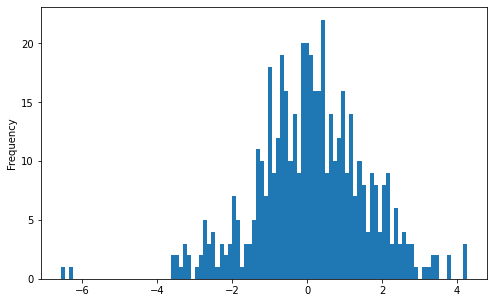

In [ ]:
valor_carteira['Retorno Diário'].plot(kind='hist', bins=100, figsize=(8,5)) 
# kind='hist defique que será do modelo Histograma. bins=100 defina quantas linhas vão aparecer, barras.

### Calculo da Distribuição Diário da Carteira. Usando um Gráfico de Linha no modelo Histograma.

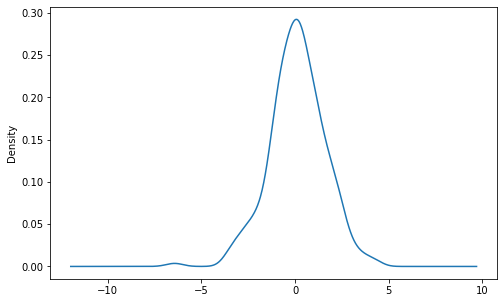

In [ ]:
valor_carteira['Retorno Diário'].plot(kind='kde', figsize=(8,5))

## Calculando o Retorno ACUMULADO da carteira

In [ ]:
retorno_aplicacao = (valor_carteira['Total R$'][-1] / valor_carteira['Total R$'][0] -1) * 100

# retorno em Porcentagem

In [ ]:
retorno_aplicacao 

65.1808754869526

# Variáveis que recebe o tempo desejado

### Variáveis que recebe o tempo desejado

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,6,1)

### Criação da Lista do Carteira

In [ ]:
papeis = ['btow3.sa', 'lame4.sa', 'sled4.sa', '^bvsp']


# Pegando Dados da Carteira no Yahoo

In [ ]:
#carteira = dt.get_data_yahoo(papeis, start, end)['Adj Close']
carteira = y.download(papeis, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- BTOW3.SA: No data found, symbol may be delisted


In [ ]:
carteira.columns = ['B2W Digital', 'Lojas Americanas', 'Saraiva', 'Ibovespa']

In [ ]:
carteira.tail()

,B2W Digital,Lojas Americanas,Saraiva,Ibovespa
Date,,,,
2020-05-25,NaN,25.475288,24.850372,85663.0
2020-05-26,NaN,26.613020,23.800358,85469.0
2020-05-27,NaN,28.591682,24.500366,87946.0
2020-05-28,NaN,28.403708,24.150362,86949.0
2020-05-29,NaN,27.948616,24.150362,87403.0


# Mostrando o Resultado da Carteira no Gráfico NORMALIZADO

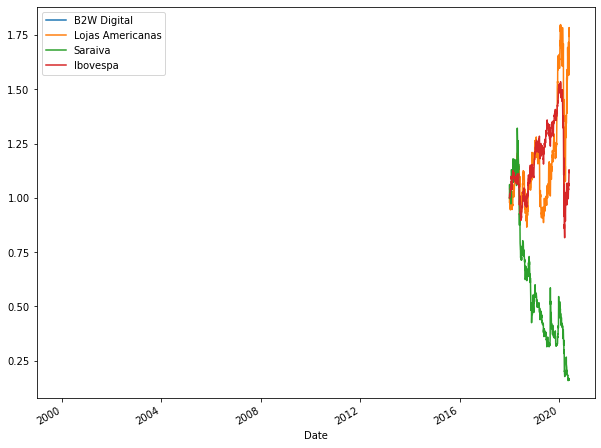

In [ ]:
(carteira / carteira.iloc[0]).plot(figsize=(10,8))